**TESTE USANDO UM MÉTODO DE VETORIZAÇÃO DA BIBLIOTECA SKLEARN**

In [1]:
#Import de bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import nltk
import string
from nltk.corpus import stopwords

In [3]:
import seaborn as sns

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
from sklearn.feature_extraction.text import TfidfTransformer

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

**DEFININDO UM MÉTODO QUE VAI REMOVER A PONTUAÇÃO E REMOVER AS PALAVRAS IRRELEVANTES**

In [7]:
def test_process(mess):
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    sms = [word for word in nopunc.split() if word.lower() not in stopwords.words('portuguese')]
    return sms

In [8]:
#Leitura da base usada no teste
df = pd.read_excel('Base_teste.xlsx')

**BOW = BAG OF WORDS - Uma matriz onde cada linha corresponde a uma ementa e cada coluna a uma das palavras do total de palavras de todas as ementas!!**

In [9]:
bow = CountVectorizer(analyzer=test_process).fit(df['Ementa'])

In [10]:
print(len(bow.vocabulary_))

268


In [11]:
ementabow = bow.transform(df['Ementa'])

In [12]:
print(ementabow.shape)

(21, 268)


In [13]:
# Tamanho da matriz: 21 (ementas) por 268 (palavras únicas)

In [14]:
Tdidf = TfidfTransformer()

In [15]:
Tdidfementa = Tdidf.fit(ementabow)

In [16]:
ementavetor = Tdidf.transform(ementabow)

**Vetorização e mais um pequeno teste**

In [17]:
vectorizer = TfidfVectorizer(tokenizer=test_process)

In [18]:
def cosine_sim(text1, text2):
    tfidf = vectorizer.fit_transform([text1, text2])
    return ((tfidf * tfidf.T).A)[0,1]

In [19]:
a = 'Esse texto é pouco parecido com o outros'
b = 'Matemática e ensino das ciencias aplicadas para alunos do ensino escolar básico'
c = 'Ensino nas escolas'
d = 'Matemática no ensino médio'
e = 'Esse aqui não é nada'

In [20]:
lista = [a, b, c, d, e]
for x in lista:
    for y in lista:
        print(x, '<<com>>',y)
        print(cosine_sim(x,y))

Esse texto é pouco parecido com o outros <<com>> Esse texto é pouco parecido com o outros
0.9999999999999999
Esse texto é pouco parecido com o outros <<com>> Matemática e ensino das ciencias aplicadas para alunos do ensino escolar básico
0.0
Esse texto é pouco parecido com o outros <<com>> Ensino nas escolas
0.0
Esse texto é pouco parecido com o outros <<com>> Matemática no ensino médio
0.0
Esse texto é pouco parecido com o outros <<com>> Esse aqui não é nada
0.15064018498706508
Matemática e ensino das ciencias aplicadas para alunos do ensino escolar básico <<com>> Esse texto é pouco parecido com o outros
0.0
Matemática e ensino das ciencias aplicadas para alunos do ensino escolar básico <<com>> Matemática e ensino das ciencias aplicadas para alunos do ensino escolar básico
0.9999999999999999
Matemática e ensino das ciencias aplicadas para alunos do ensino escolar básico <<com>> Ensino nas escolas
0.29121941856368966
Matemática e ensino das ciencias aplicadas para alunos do ensino esco

In [21]:
matrizfinal = np.zeros(shape=(len(df),len(df)))
matrizcont = 0

**Criação da matriz com os dados de teste**

In [22]:
for x in range(len(df)):
    for y in range(x,len(df)):
        matrizfinal[x][y]= cosine_sim(df.iloc[x][1], df.iloc[y][1])
        if matrizfinal[x][y] > 0.75 and x != y and matrizfinal[x][y] < 0.999:
            matrizcont +=1


In [23]:
print(matrizcont)

4


In [24]:
resultado = pd.DataFrame(matrizfinal)
resultado.to_csv("vectorizer_Teste.csv", header=None, index=None)

**Visualizando alguns dados**

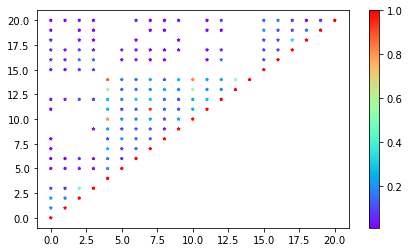

In [40]:
A = np.asarray(resultado)
x,y = A.nonzero()

plt.figure(figsize=(7,4))
plt.scatter(x,y,c=A[x,y],s=8,cmap='rainbow',marker='*') 
plt.colorbar()

plt.show()

In [30]:
for x in range(len(resultado)):
    for y in range(len(resultado)):
        if resultado[x][y] > 0.45 and x != y and matrizfinal[x][y] < 0.999:
            print('Encontrou as disciplinas:')
            print(df.iloc[x][0],"             ", df.iloc[y][0])
            print(resultado[x][y])
            print('###')

Encontrou as disciplinas:
Direito do Trabalho               Direito e Legislação Social
0.4754193685286694
###
Encontrou as disciplinas:
Estatística Aplicada às Ciências Sociais               Probabilidade e Estatística
0.8037311277734123
###
Encontrou as disciplinas:
Estatística Aplicada               Estatística I
0.9201673501827025
###
Encontrou as disciplinas:
Métodos Estatísticos               Probabilidade e Estatística
0.6090461303795285
###
Encontrou as disciplinas:
Métodos Estatísticos               Estatística Aplicada às Ciências Sociais
0.5505148815949558
###
Encontrou as disciplinas:
Probabilidade e Estatística para Licenciatura               Probabilidade e Estatística
0.8831282039194522
###
Encontrou as disciplinas:
Probabilidade e Estatística para Licenciatura               Estatística Aplicada às Ciências Sociais
0.828785793956999
###
Encontrou as disciplinas:
Probabilidade e Estatística para Licenciatura               Métodos Estatísticos
0.5452535979648305
###
